In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import re

# Adjust the path to point to your project root.
project_root = os.path.abspath('/Users/treycole/Repos/axion-pert')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from modules.qe_read_file import (
    read_w90_band_dat, read_labelinfo, read_bands_gnu, get_symmetry_kpath_labels,
    read_bands_dat_filband, kpath_distance ,plot_bands
)

In [2]:
# def plot_bands(
#         E: np.ndarray,
#         kpts: np.ndarray,
#         segments: list[int],
#         labels: list[str],
#         ef: float | None = None,
#         ylim: tuple[float, float] | None = None,
#         title: str | None = None, outfile: str | None = None):
#     """
#     Plot bands vs k-point index.

#     Parameters
#     ----------
#     E : (nks, nbnd) array
#     ef : float or None
#         If given, subtract this Fermi level (eV).
#     ylim : (ymin, ymax) or None
#     title : str or None
#     outfile : str or None
#         If provided, save to this path; otherwise just show.
#     """
#     fig, ax = plt.subplots()

#     nks, nbnd = E.shape
#     k = kpts
#     assert len(k) == nks, "kpts length must match E.shape[0]"
#     Y = E if ef is None else (E - ef)

#     # Get high-symmetry k-path labels
#     xticks, xlabels = get_symmetry_kpath_labels(kpts, segments, labels)

#     # Set high-symmetry k-path labels
#     ax.set_xticks(xticks)
#     ax.set_xticklabels(xlabels)
#     for x in xticks:
#         ax.axvline(x, color='gray', lw=0.5, ls='-')

#     for j in range(nbnd):
#         ax.plot(k, Y[:, j], color='b', lw=0.7)

#     # Fermi level
#     if ef is not None:
#         ax.axhline(0, color='k', lw=0.5, ls='--')
#         ax.set_ylabel(r"Energy − $E_F$ (eV)")
#     else:
#         ax.set_ylabel("Energy (eV)")   

#     ax.set_xlabel("k-point index along path")
#     ax.set_xlim(k[0], k[-1])

#     if ylim: 
#         ax.set_ylim(*ylim)

#     ax.set_title(title or f"Band structure ({nbnd} bands, {nks} k-points)")
#     return fig, ax

In [3]:
E_F = 7.5901 # eV

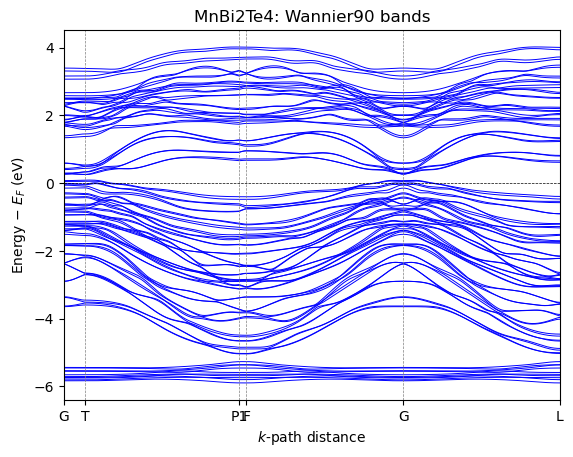

In [7]:
k, E, labels = read_w90_band_dat("MnBi2Te4_band.dat", return_labels=True)
fig, ax = plot_bands(k, E, labels, ef=E_F, title="MnBi2Te4: Wannier90 bands")

In [ ]:
from modules.qe_read_file import read_amn

In [6]:
# Example usage:
A, kpts, info = read_amn("MnBi2Te4.amn")
# A.shape -> (nk, nbnd, nproj); e.g. A[ik, m, n] is <psi_{m,k} | g_n>

In [7]:
V, S, W = np.linalg.svd(A)

In [8]:
S.shape

(512, 92)

In [9]:
# np.where(S > 1)[0].shape[0]/64

In [10]:
# S[0]

(0.5, 0.7)

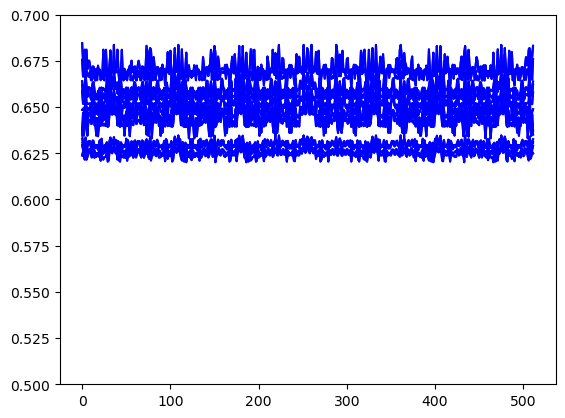

In [13]:
# plt.plot(np.arange(S.shape[0]), S[:, 20: -24], c='b')
plt.plot(np.arange(S.shape[0]), S, c='b')
plt.ylim(0.5,0.7)